In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

import plotly.graph_objects as go


from case_edits.recipes.two_zone import ezcase as ez

from helpers.plots import plot_line_string, get_plotly_colors, plot_rectangle_shape, RectFromCoords, get_plottable_coords

Added 5 walls 
Added 4 walls 
cases/tests/test16_ezcase/out.idf


In [2]:
zones = ez.case.geometry.zones
polygon = zones.B_00.polygon
[c for c in polygon.exterior.coords]

[(100.0, 100.0),
 (100.0, 70.0),
 (50.0, 70.0),
 (0.0, 70.0),
 (0.0, 100.0),
 (100.0, 100.0)]

In [3]:
RectFromCoords(polygon.exterior.coords)

Rect((0.0, 70.0), (100.0, 100.0))

In [44]:
x, y = get_plottable_coords(polygon.exterior.coords)
min(x)

0.0

In [42]:
for wall in zones.B_00.wall_list:
    print((wall.display_name, [c for c in wall.line.coords]))

('Block 00 - East - W01', [(100.0, 70.0), (100.0, 100.0)])
('Block 00 - North - W02', [(100.0, 100.0), (0.0, 100.0)])
('Block 00 - West - W03', [(0.0, 100.0), (0.0, 70.0)])
('Block 00 - South - W04_1', [(0.0, 70.0), (50.0, 70.0)])
('Block 00 - South - W04_2', [(50.0, 70.0), (100.0, 70.0)])


In [2]:
cols, _ = get_plotly_colors(12)
cols = [str(c) for c in cols]

In [3]:
cols[1]

'rgb(66, 82, 189)'

In [9]:
def get_vals(ix_str):
    return [z[ix_str] for z in plot_dict.values()]

In [26]:
zones = ez.case.geometry.zones

plot_dict = {}
for zone in zones.values():
    plot_dict[zone.bunch_name] = plot_rectangle_shape(zone.polygon)


buffer = 20


min_x = min(get_vals("x0"))
max_x = max(get_vals("x1"))

min_y = min(get_vals("y0"))
max_y = max(get_vals("y1"))

# in any case will have to find the extents of this.. 
x_range = [min_x - buffer, max_x + buffer]
y_range = [min_y - buffer, max_y + buffer]

x_dif = x_range[1] - x_range[0]
y_dif = y_range[1] - y_range[0]

# aspect ration todo.. 

fig = go.Figure()

for trace_dict in plot_dict.values():
    fig.add_shape(**trace_dict)





fig.update_xaxes(range=x_range)
fig.update_yaxes(range=y_range)

fig.show()

In [23]:
min_x = min(get_vals("x0"))
max_x = max(get_vals("x1"))

min_y = min(get_vals("y0"))
max_y = max(get_vals("y1"))

print(min_y)
# [min_x, max_x]
[min_y, max_y]


0.0


[0.0, 100.0]

In [4]:
d = plot_rectangle_shape(zones.B_00.polygon)
d

{'type': 'rect',
 'xref': 'x',
 'yref': 'y',
 'fillcolor': 'blue',
 'x0': 0.0,
 'y0': 70.0,
 'x1': 100.0,
 'y1': 100.0,
 'label': {'text': None}}

In [7]:
buffer = 20
# todo, why is the max not x1 in this d?
# in any case will have to find the extents of this.. 
x_range = [d["x0"] - buffer, d["x1"] + buffer]
y_range = [d["y0"] - buffer, d["y1"] + buffer]

In [8]:
fig = go.Figure(layout=dict(height=400, width=400))

fig.add_shape(**d)

fig.update_xaxes(range=x_range)
fig.update_yaxes(range=y_range)

fig.show()

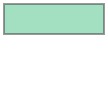

In [7]:
zones.B_00.polygon